In [1]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import clhs as cl

# Create a Dataset

In [2]:
ds = xr.tutorial.open_dataset('air_temperature') # use xr.tutorial.load_dataset() for xarray<v0.11.0
df=ds["air"][0,:,:].to_dataframe().reset_index()[["lat","lon","air"]]
# set temperature and relative humidity, relative humidty is normal distribution
df["temp"] = df["air"]-273.15
df["rh"] = np.random.normal(50, 12, 1325)
df.shape[0]

1325

# Implement cLHS

In [3]:
# set sample number
num_sample=15
# cLHS
sampled=cl.clhs(df[["temp","rh"]], num_sample, max_iterations=1000)
clhs_sample=df.iloc[sampled["sample_indices"]]
# random sample, as a comparison
random_sample=df.sample(num_sample)

cLHS:100%|██████████|1000/1000 [Elapsed time: 6.365708112716675, ETA: 0.0, 157.09it/s]                


# Visualization

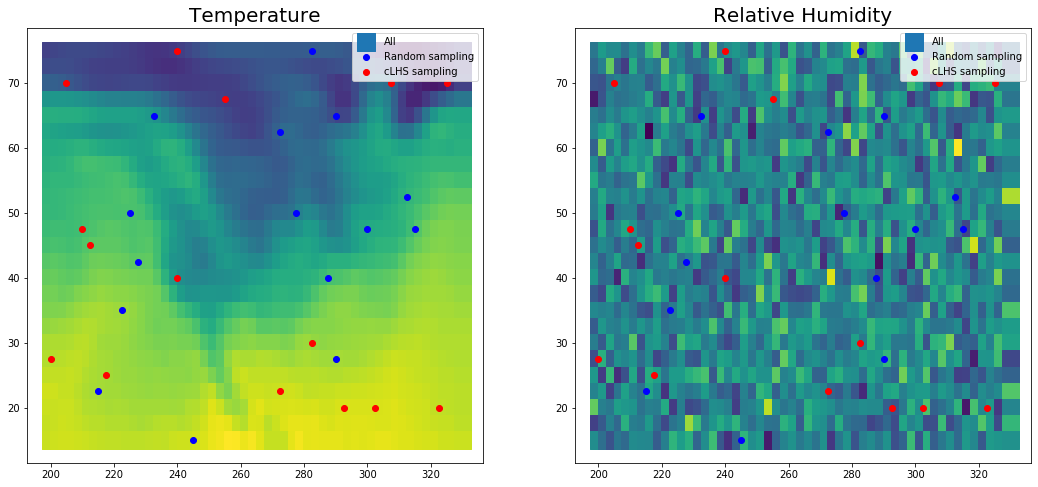

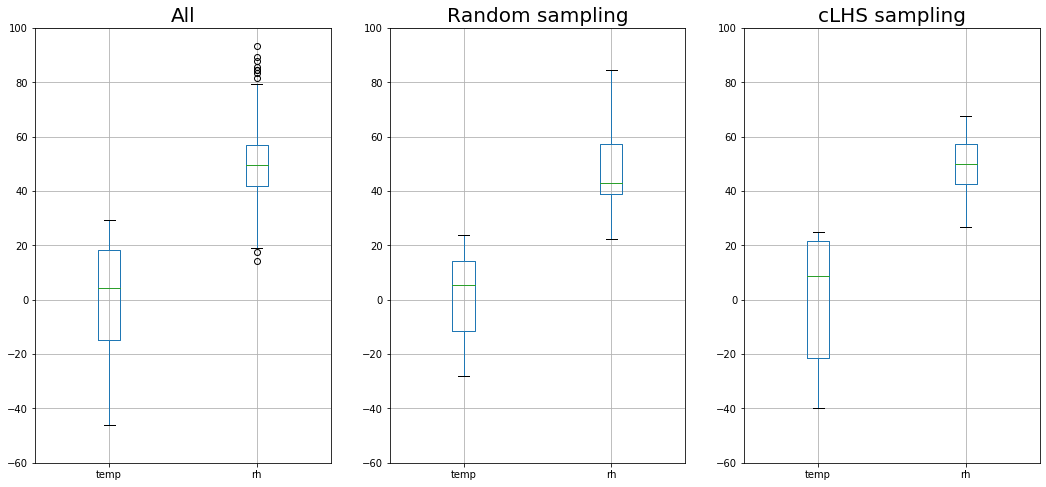

Overall
              temp           rh
count  1325.000000  1325.000000
mean      1.016275    49.783078
std      19.110956    11.866438
min     -46.149994    14.095438
25%     -14.859985    41.674848
50%       4.350006    49.635435
75%      18.250000    57.099548
max      29.450012    93.291254


Random sampling
            temp         rh
count  15.000000  15.000000
mean    0.866668  47.374234
std    17.082689  16.324525
min   -27.949997  22.440250
25%   -11.355003  39.034426
50%     5.350006  43.010765
75%    14.399994  57.418314
max    23.640015  84.635052


cLHS sampling
            temp         rh
count  15.000000  15.000000
mean    1.048006  49.060304
std    24.219866  11.522810
min   -39.949997  26.673582
25%   -21.555000  42.597241
50%     8.850006  50.116637
75%    21.640015  57.448803
max    24.950012  67.569718




In [4]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize=(18,8))
ax1.scatter(df["lon"],df["lat"],label="All",c=df["temp"],marker="s",s=300)
ax1.scatter(random_sample["lon"],random_sample["lat"],label="Random sampling",c="blue")
ax1.scatter(clhs_sample["lon"],
           clhs_sample["lat"],
           label="cLHS sampling",c="red")
ax1.legend()
ax1.set_title("Temperature",fontsize=20)

ax2.scatter(df["lon"],df["lat"],label="All",c=df["rh"],marker="s",s=300)
ax2.scatter(random_sample["lon"],random_sample["lat"],label="Random sampling",c="blue")
ax2.scatter(clhs_sample["lon"],
           clhs_sample["lat"],
           label="cLHS sampling",c="red")
ax2.legend()
ax2.set_title("Relative Humidity",fontsize=20)
plt.show()


fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(18,8))
df[["temp","rh"]].boxplot(ax=ax1)
random_sample[["temp","rh"]].boxplot(ax=ax2)
clhs_sample[["temp","rh"]].boxplot(ax=ax3)
ax1.set_ylim([-60,100])
ax1.set_title("All",fontsize=20)
ax2.set_ylim([-60,100])
ax2.set_title("Random sampling",fontsize=20)
ax3.set_ylim([-60,100])
ax3.set_title("cLHS sampling",fontsize=20)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.show()

print("Overall")
print(df[["temp","rh"]].describe())
print("\n")
print("Random sampling")
print(random_sample[["temp","rh"]].describe())
print("\n")
print("cLHS sampling")
print(clhs_sample[["temp","rh"]].describe())
print("\n")